In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.stats.mstats import normaltest # D'Agostino K^2 Test
from scipy.stats import boxcox

### **Transforming Target**
1. Log Test
2. Square Root
3. Box Cox

Apply transformations to make target variable more normally distributed for regression.

In [6]:
df_train = pd.read_csv("/content/EssaySet01_Features.csv", index_col =0)
df_train.head()

,Sent_Count,Word_Count,Char_Count,Avg_Word_Count,Verb_Count,Noun_Count,Adj_Count,Conj_Count,Adverb_Count,pNoun_Count,...,Capitalization_Errors,Grammar_Error_Count,Unnamed: 18,Punctuation_Errors,Unnamed: 20,Grammar_Error_List,Number_of_Connectors,Connectivity_Index,Semantic_Similarity,Total Score
0,16,386,1875,3.984456,55,74,18,14,15,48,...,2,2,NaN,1,NaN,"['CAUSE_BECAUSE', 'BE_VBP_IN']",41,24.552787,0.396690,8
1,20,464,2288,4.030172,71,97,19,18,19,49,...,0,4,NaN,6,NaN,"['ON_COMPOUNDS', 'NODT_DOZEN', 'YOU_HAV', 'DT_...",52,25.344232,0.311087,9
2,14,313,1541,4.035144,42,69,17,16,11,25,...,1,5,NaN,4,NaN,"['THE_SUPERLATIVE', 'PHRASE_REPETITION', 'ITS_...",35,14.662850,0.291317,7
3,27,611,3165,4.328969,71,126,39,17,21,33,...,1,0,NaN,2,NaN,[],60,32.408323,0.269810,10
4,30,517,2569,4.071567,61,107,30,15,34,41,...,1,1,NaN,2,NaN,['ARN_T'],58,27.824804,0.264052,8


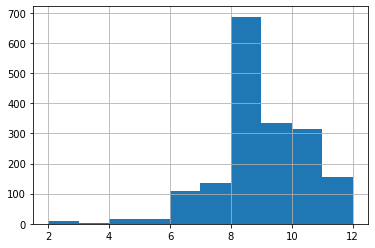

In [7]:
df_train['Total Score'].hist()

In [11]:
#This test outputs a "p-value". The higher this p-value is the closer the distribution is to normal.
#If the p-value > 0.05, then it is bell-curve distribution.
#Our data is clearly right skewed (Histogram)
normaltest(df_train['Total Score'].values)  

NormaltestResult(statistic=127.21536231858303, pvalue=2.3742971207847717e-28)

#### Transforming Target Through Log Test

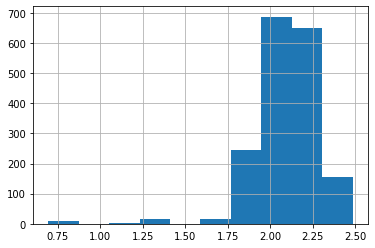

In [13]:
log_scores = np.log(df_train['Total Score'])
log_scores.hist();

In [14]:
log_scores

0       2.079442
1       2.197225
2       1.945910
3       2.302585
4       2.079442
          ...   
1778    2.079442
1779    1.945910
1780    2.079442
1781    0.693147
1782    1.945910
Name: Total Score, Length: 1783, dtype: float64

In [15]:
normaltest(log_scores)   # No significant change in p-value

NormaltestResult(statistic=967.974762708955, pvalue=6.411371863279588e-211)

Transforming Through Square Root Transformation

(array([ 10.,   1.,  17.,   0.,  17., 110., 822., 334., 316., 156.]),
 array([1.41421356, 1.61920237, 1.82419117, 2.02917998, 2.23416878,
        2.43915759, 2.64414639, 2.8491352 , 3.054124  , 3.25911281,
        3.46410162]),
 <a list of 10 Patch objects>)

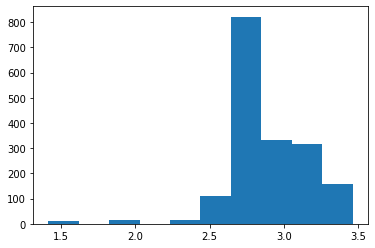

In [16]:
sqrt_scores = np.sqrt(df_train['Total Score'])
plt.hist(sqrt_scores)

In [17]:
normaltest(sqrt_scores)

NormaltestResult(statistic=456.280616698139, pvalue=8.316162831695822e-100)

Target Transformation Through BoxCox



In [20]:
bc_result = boxcox(df_train['Total Score'])
boxcox_score = bc_result[0]
lam = bc_result[1]
lam

1.5655301603375742

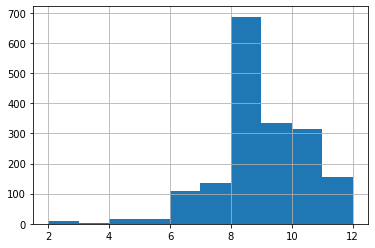

In [21]:
df_train['Total Score'].hist();

In [22]:
normaltest(boxcox_score)

NormaltestResult(statistic=17.904988785940628, pvalue=0.00012941394786243168)

Significantly more normally distributed (according to p value) than the other two distributions

### **Linear Regression**